[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rycroft-group/math714/blob/main/d_elliptic/elliptic.ipynb)

In [ ]:
# Necessity libraries
import numpy as np

%matplotlib ipympl
# for interactive figures in Jupyter notebooks
# cannot have comments after it
import matplotlib.pyplot as plt
from math import *
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Optional: a library for plotting with LaTeX-like 
# styles nicer formatted figures
# Warning: need to have LaTeX installed
import scienceplots
plt.style.use(['science'])

# Elliptic equations

## Solving the Poisson equation (5-point Laplacian stencil)

We now solve the Poisson equation
$$
\nabla^2 u = f
$$
on the domain $\Omega = [0,1]^2$ using
$$
f(x,y) = \exp \left( -3 \left( (x-0.3)^2 + (y-0.7)^2 \right) \right)
$$
and
$$
u = 0 \qquad \text{on $\partial \Omega$.}
$$

### Setting up the matrix and source term

In [3]:
# Grid setup
m = 25
mm = m*m
h = 1.0/(m+1)

# Create derivative matrix and source term
d = np.zeros((mm, mm))
f = np.empty((mm))
hfac = 1/(h*h)
for i in range(m):
    y = (i+1)*h
    for j in range(m):
        ij = m*j+i

        # Construct 5-point Laplacian stencil
        d[ij, ij] = -4*hfac
        if i > 0:
            d[ij, ij-1] = hfac
        if i < m-1:
            d[ij, ij+1] = hfac
        if j > 0:
            d[ij, ij-m] = hfac
        if j < m-1:
            d[ij, ij+m] = hfac

        # Source term
        x = (j+1)*h
        f[ij] = -exp(-3*((x-0.3)**2+(y-0.7)**2))

### Visualize the derivative matrix

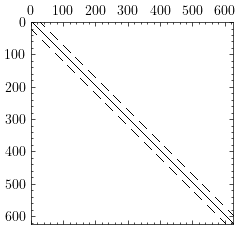

In [4]:
plt.spy(d)
plt.show()

### Solve the linear system and plot

In [5]:
# Solve the linear system
u = np.linalg.solve(d, f)

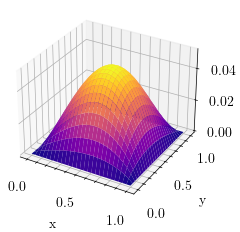

In [6]:
# Reconstruct full grid
uu = np.zeros((m+2, m+2))
for i in range(m):
    uu[i+1, 1:m+1] = u[i*m:(i+1)*m]

# Plot using Matplotlib
xa = np.linspace(0, 1, m+2)
mgx, mgy = np.meshgrid(xa, xa)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(mgx, mgy, uu, cmap=cm.plasma,
                       rstride=1, cstride=1, linewidth=0)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
plt.show()